<a href="https://colab.research.google.com/github/tallerzalan/Applied-Machine-Learning/blob/main/Exercise_1_svm_2_classes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise - SVM for classification of 2 classes

1. Replicate the example from the slides, but using the $\texttt{make_moons}$ instead of the $\texttt{make_circles}$ dataset. That is, replace $\texttt{from sklearn.datasets import make_circles}$ with $\texttt{from sklearn.datasets import make_moons}$ and use this new function to generate $\texttt{X}$ and $\texttt{y}$. Then, check how the linear, polynomial, and radial basis function performs on this new dataset (by calculating and reporting their test accuracies).
1. The default setting for $C$, the regularization parameter, is $1$. Try to adjust this (both up and down) and see how the performance of your models changes.
1. Try to split your training data (again using $\texttt{train_test_split}$) to obtain a validation set. Try to tune your **polynomial** SVM (by changing the degree of the kernel and C) to obtain the best model on your validation data. Apply this model to your test data. Did you improve your model's performance on the test data?

**See slides for more details!**

# Exercise 1

Replicate the example from the slides, but using the $\texttt{make_moons}$ instead of the $\texttt{make_circles}$ dataset. That is, replace $\texttt{from sklearn.datasets import make_circles}$ with $\texttt{from sklearn.datasets import make_moons}$ and use this new function to generate $\texttt{X}$ and $\texttt{y}$. Then, check how the linear, polynomial, and radial basis function performs on this new dataset (by calculating and reporting their test accuracies).

(800, 2) (200, 2) (800,) (200,)


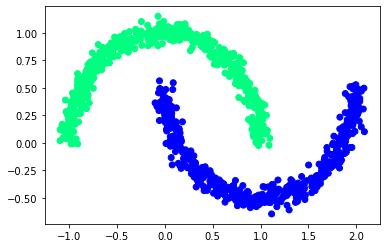

In [ ]:
from sklearn.datasets import make_moons # import the make_moons dataset!
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm
from matplotlib import pyplot as plt

# Use the `make_moons` function to construct your dataset
X, y = make_moons(n_samples = 1000, noise = 0.05, random_state = 9)

# Use `train_test_split` to split your data into a train and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 9)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Let us look at the data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap = plt.get_cmap("winter_r"))
plt.show()

In [ ]:
# Initialize a linear SVM
svm_linear = svm.SVC(kernel = 'linear')

# Fit your SVM
svm_linear.fit(X_train, y_train)

# Predict on your test data with your linear SVM
y_test_hat_linear = svm_linear.predict(X_test)

# Obtain accuracy by using the `accuracy_score` function
accuracy_linear = accuracy_score(y_test_hat_linear, y_test)

# Print results
print(f'Linear SVM achieved {round(accuracy_linear * 100, 1)}% accuracy.')

Linear SVM achieved 89.0% accuracy.


In [ ]:
# Initialize a polynomial SVM of degree 2
svm_poly = svm.SVC(kernel = 'poly', degree = 2)

# Fit your SVM
svm_poly.fit(X_train, y_train)

# Predict on your test data with your linear SVM
y_test_hat_poly = svm_poly.predict(X_test)

# Obtain accuracy by using the 'accuracy_score' function
accuracy_poly = accuracy_score(y_test_hat_poly, y_test)

# Print results
print(f'Polynomial SVM achieved {round(accuracy_poly * 100, 1)}% accuracy.')

Polynomial SVM achieved 77.5% accuracy.


In [ ]:
# Do the same for the radial basis function kernel!
# Remember to look at the example for hints

# Estimating a radial basis function SVM
svm_rbf = svm.SVC(kernel = 'rbf')
svm_rbf.fit(X_train, y_train)

# ... and predicting
y_test_hat_rbf = svm_rbf.predict(X_test)
accuracy_rbf = accuracy_score(y_test_hat_rbf, y_test)
print(f'Radial Basis Function SVM achieved {round(accuracy_rbf * 100, 1)}% accuracy.')

Radial Basis Function SVM achieved 100.0% accuracy.


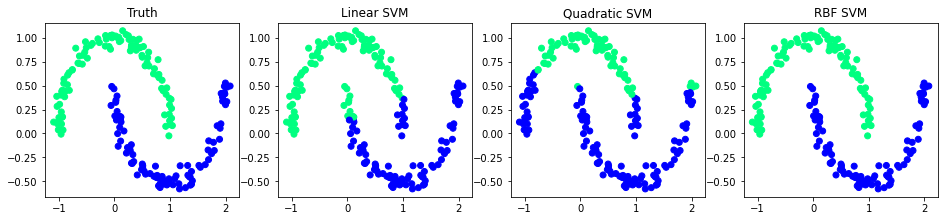

In [ ]:
# Visualize your results (you do not need to change anything in this block)
fig = plt.figure(figsize = plt.figaspect(0.2))
ax = fig.add_subplot(1, 4, 1)
ax.scatter(X_test[:, 0], X_test[:, 1], c = y_test, cmap = plt.get_cmap("winter_r"))
plt.title('Truth')

ax = fig.add_subplot(1, 4, 2)
ax.scatter(X_test[:, 0], X_test[:, 1], c = y_test_hat_linear, cmap = plt.get_cmap("winter_r"))
plt.title('Linear SVM')

ax = fig.add_subplot(1, 4, 3)
ax.scatter(X_test[:, 0], X_test[:, 1], c = y_test_hat_poly, cmap = plt.get_cmap("winter_r"))
plt.title('Quadratic SVM')

ax = fig.add_subplot(1, 4, 4)
ax.scatter(X_test[:, 0], X_test[:, 1], c = y_test_hat_rbf, cmap = plt.get_cmap("winter_r"))
plt.title('RBF SVM')

plt.show()

# Exercise 2

The default setting for $C$, the regularization parameter, is $1$. Try to adjust this (both up and down) and see how the performance of your models changes.

I suggest using $0.01$ for the low value and $100$ for the high value, but you decide.

Perhaps do it just for the polynomial and the RBF kernels.

In [ ]:
# Do it for a polynomial kernel of whatever degree you want (but SAME for both!)

# Initialize 2 polynomial SVMs, one with low and one with high C
svm_poly_low_C = svm.SVC(kernel = 'poly', degree = 2, C = 0.01)
svm_poly_high_C = svm.SVC(kernel = 'poly', degree = 2, C = 100)

# Fit your SVMs
svm_poly_low_C.fit(X_train, y_train)
svm_poly_high_C.fit(X_train, y_train)

# Predict on your test data with your polynomial SVMs
y_test_hat_poly_low_C = svm_poly_low_C.predict(X_test)
y_test_hat_poly_high_C = svm_poly_high_C.predict(X_test)

# Obtain accuracies of your linear SVMs by using the 'accuracy_score' function
accuracy_poly_low_C = accuracy_score(y_test_hat_poly_low_C, y_test)
accuracy_poly_high_C = accuracy_score(y_test_hat_poly_high_C, y_test)

# Print results
print(f'Polynomial SVM with low C achieved {round(accuracy_poly_low_C * 100, 1)}% accuracy.')
print(f'Polynomial SVM with high C achieved {round(accuracy_poly_high_C * 100, 1)}% accuracy.')

Polynomial SVM with low C achieved 68.0% accuracy.
Polynomial SVM with high C achieved 77.5% accuracy.


In [ ]:
# Next you should do it for a RBF kernel

# Initialize 2 polynomial RBF, one with low and one with high C
svm_rbf_low_C = svm.SVC(kernel = 'rbf', C = 0.01)
svm_rbf_high_C = svm.SVC(kernel = 'rbf', C = 100)

# Fit your SVMs
svm_rbf_low_C.fit(X_train, y_train)
svm_rbf_high_C.fit(X_train, y_train)

# Predict on your test data with your polynomial SVMs
y_test_hat_rbf_low_C = svm_rbf_low_C.predict(X_test)
y_test_hat_rbf_high_C = svm_rbf_high_C.predict(X_test)

# Obtain accuracies of your linear SVMs by using the `accuracy_score` function
accuracy_rbf_low_C = accuracy_score(y_test_hat_rbf_low_C, y_test)
accuracy_rbf_high_C = accuracy_score(y_test_hat_rbf_high_C, y_test)

# Print results
print(f'RBF SVM with low C achieved {round(accuracy_rbf_low_C * 100, 1)}% accuracy.')
print(f'RBF SVM with high C achieved {round(accuracy_rbf_high_C * 100, 1)}% accuracy.')

RBF SVM with low C achieved 91.5% accuracy.
RBF SVM with high C achieved 100.0% accuracy.


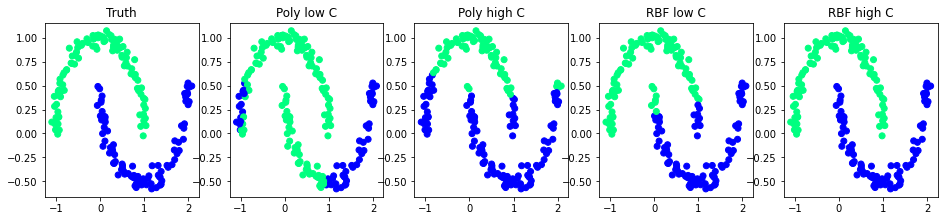

In [ ]:
# Visualize your results (you do not need to change anything in this block!)
fig = plt.figure(figsize = plt.figaspect(0.2))
ax = fig.add_subplot(1, 5, 1)
ax.scatter(X_test[:, 0], X_test[:, 1], c = y_test, cmap = plt.get_cmap("winter_r"))
plt.title('Truth')

ax = fig.add_subplot(1, 5, 2)
ax.scatter(X_test[:, 0], X_test[:, 1], c = y_test_hat_poly_low_C, cmap = plt.get_cmap("winter_r"))
plt.title('Poly low C')

ax = fig.add_subplot(1, 5, 3)
ax.scatter(X_test[:, 0], X_test[:, 1], c = y_test_hat_poly_high_C, cmap = plt.get_cmap("winter_r"))
plt.title('Poly high C')

ax = fig.add_subplot(1, 5, 4)
ax.scatter(X_test[:, 0], X_test[:, 1], c = y_test_hat_rbf_low_C, cmap = plt.get_cmap("winter_r"))
plt.title('RBF low C')

ax = fig.add_subplot(1, 5, 5)
ax.scatter(X_test[:, 0], X_test[:, 1], c = y_test_hat_rbf_high_C, cmap = plt.get_cmap("winter_r"))
plt.title('RBF high C')

plt.show()

# Exercise 3

Try to split your training data (again using $\texttt{train_test_split}$) to obtain a validation set. Try to tune your **polynomial** SVM (by changing the degree of the kernel and C) to obtain the best model on your validation data. Apply this model to your test data. Did you improve your model's performance on the test data?

In [ ]:
# Start by splitting training data into train and a validation data
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 9)
print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape)

(640, 2) (160, 2) (200, 2) (640,) (160,) (200,)


In [ ]:
poly_degrees = [degree for degree in range(1, 11, 1)] # input values seperated by ",".
Cs = [C for C in range(100, 1001, 100)] # input values seperated by ",".
print(poly_degrees)
print(Cs)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]


In [ ]:
# Try to use different degrees and Cs
import pandas as pd
import numpy as np

poly_degrees = [degree for degree in range(1, 11, 1)] # input values seperated by ",".
Cs = [C for C in range(100, 1001, 100)] # input values seperated by ",".

results = []

for degree in poly_degrees:
    for C in Cs:
        svm_poly = svm.SVC(kernel = 'poly', degree = degree, C = C)
        svm_poly.fit(X_train, y_train)
        y_val_hat = svm_poly.predict(X_val)
        accuracy = accuracy_score(y_val_hat, y_val)
        
        results.append([accuracy, degree, C])

results = pd.DataFrame(results)
results.columns = ['Accuracy', 'Polynomial degree', 'C']
print(results)

    Accuracy  Polynomial degree     C
0    0.84375                  1   100
1    0.84375                  1   200
2    0.84375                  1   300
3    0.84375                  1   400
4    0.84375                  1   500
..       ...                ...   ...
95   0.81875                 10   600
96   0.81875                 10   700
97   0.81875                 10   800
98   0.81875                 10   900
99   0.81875                 10  1000

[100 rows x 3 columns]


In [ ]:
# Extract best parameters
results[results['Accuracy'] == results['Accuracy'].max()]

,Accuracy,Polynomial degree,C
20,0.93125,3,100
21,0.93125,3,200
22,0.93125,3,300
23,0.93125,3,400
24,0.93125,3,500
25,0.93125,3,600
26,0.93125,3,700
27,0.93125,3,800
28,0.93125,3,900
29,0.93125,3,1000


In [ ]:
# Initialize your final model
svm_poly_best = svm.SVC(kernel = 'poly', degree = 5, C = 1000)

# Use both training and validation data to fit it (np.concatenate "stacks" the array like rbind in R)
svm_poly_best.fit(np.concatenate([X_train, X_val]), np.concatenate([y_train, y_val]))

# Predict on test data
y_val_hat_poly_best = svm_poly_best.predict(X_test)

# Obtain and check accuracy on test data
accuracy_poly_best = accuracy_score(y_val_hat_poly_best, y_test)
print(f'Optimized polynomial SVM achieved {round(accuracy_poly_best * 100, 1)}% accuracy.')

Optimized polynomial SVM achieved 94.0% accuracy.


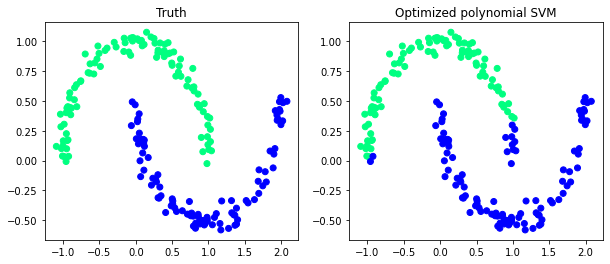

In [ ]:
# Visualize your results (you do not need to change anything in this block)
fig = plt.figure(figsize = plt.figaspect(0.4))
ax = fig.add_subplot(1, 2, 1)
ax.scatter(X_test[:, 0], X_test[:, 1], c = y_test, cmap = plt.get_cmap("winter_r"))
plt.title('Truth')

ax = fig.add_subplot(1, 2, 2)
ax.scatter(X_test[:, 0], X_test[:, 1], c = y_val_hat_poly_best, cmap = plt.get_cmap("winter_r"))
plt.title('Optimized polynomial SVM')

plt.show()